In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from math import sqrt

In [129]:
# lets import the energy data and have a quick look
df = pd.read_csv('energydata.csv')
print(df.shape)
df.head(10)

(36168, 9)


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
0,MAC000048,2011-12-08,0.1070,0.159217,0.576,23,0.118021,3.662,0.087
1,MAC000048,2011-12-09,0.0920,0.125750,0.570,48,0.089277,6.036,0.087
2,MAC000048,2011-12-10,0.0925,0.209646,1.322,48,0.288224,10.063,0.087
3,MAC000048,2011-12-11,0.1160,0.245187,2.001,48,0.325140,11.769,0.088
4,MAC000048,2011-12-12,0.0950,0.123188,0.326,48,0.057947,5.913,0.087
5,MAC000048,2011-12-13,0.0890,0.094813,0.116,48,0.010394,4.551,0.087
6,MAC000048,2011-12-14,0.0890,0.100250,0.367,48,0.040702,4.812,0.085
7,MAC000048,2011-12-15,0.1005,0.171625,1.287,48,0.200874,8.238,0.092
8,MAC000048,2011-12-16,0.5320,0.612542,1.591,48,0.325779,29.402,0.095
9,MAC000048,2011-12-17,0.0980,0.204313,0.995,48,0.222470,9.807,0.094


In [130]:
# the column LCLid sems like some sort of household identifier....but only if the dates repeat.
# lets check the unique LCLid's and double check a given day has all of them
print(df['LCLid'].unique())
df.sort_values('day').head(100)

['MAC000048' 'MAC000064' 'MAC000075' 'MAC000076' 'MAC000082' 'MAC000141'
 'MAC000165' 'MAC000173' 'MAC000315' 'MAC002313' 'MAC002317' 'MAC002319'
 'MAC002321' 'MAC002322' 'MAC002326' 'MAC002330' 'MAC002333' 'MAC002338'
 'MAC002340' 'MAC002341' 'MAC002343' 'MAC002355' 'MAC002359' 'MAC002360'
 'MAC002361' 'MAC002907' 'MAC003603' 'MAC004458' 'MAC004463' 'MAC004468'
 'MAC004470' 'MAC004471' 'MAC004473' 'MAC004474' 'MAC004476' 'MAC004477'
 'MAC004480' 'MAC004482' 'MAC004487' 'MAC004496' 'MAC004500' 'MAC004510'
 'MAC004511' 'MAC004512' 'MAC004517' 'MAC004518' 'MAC004519' 'MAC005263'
 'MAC005267' 'MAC005555']


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
4869,MAC000165,2011-11-24,0.1670,0.217208,0.795,24,0.169183,5.213,0.088
4870,MAC000165,2011-11-25,0.1135,0.164187,0.860,48,0.141379,7.881,0.063
5697,MAC000173,2011-11-25,0.1400,0.160231,0.366,26,0.086432,4.166,0.037
5698,MAC000173,2011-11-26,0.0760,0.121979,0.721,48,0.123860,5.855,0.035
4871,MAC000165,2011-11-26,0.1970,0.199833,0.470,48,0.106554,9.592,0.062
4872,MAC000165,2011-11-27,0.1640,0.199813,0.833,48,0.141030,9.591,0.062
5699,MAC000173,2011-11-27,0.0830,0.150000,0.843,48,0.150246,7.200,0.036
4873,MAC000165,2011-11-28,0.1290,0.175833,0.905,48,0.159578,8.440,0.061
5700,MAC000173,2011-11-28,0.1125,0.146667,0.441,48,0.110991,7.040,0.037
5701,MAC000173,2011-11-29,0.0800,0.129396,0.412,48,0.100368,6.211,0.034


In [143]:
# ok so a given day does not have all LCLid values, but some have more than one. Since the assignment just mentioned
# one entry per date I'll just take the Average over that date
energy = df[['day','energy_sum']].sort_values('day')
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d')
energy.set_index('day',inplace=True)
energy = energy.resample('D').mean()
print(energy.shape)
print(energy.isnull().any()) # check for Nan
energy.head()

(828, 1)
energy_sum    False
dtype: bool


,energy_sum
day,
2011-11-24,5.2130
2011-11-25,6.0235
2011-11-26,7.7235
2011-11-27,8.3955
2011-11-28,7.7400


In [186]:
# lets read in the weather data
df1 = pd.read_csv('weather_daily_darksky.csv')[['temperatureHigh','time']].sort_values('time')
df1.time = pd.to_datetime(df1.time,format='%Y-%m-%d')
# not sure if there are duplicate dates her but a similar resample should take care of it anyway.
weather = df1.set_index('time')
weather.index = weather.index.round('D') # round to the nearest day
weather = weather.resample('D').mean()
print(weather.shape)
print(weather.isnull().any()) # check for Nan
weather.head()

(882, 1)
temperatureHigh    False
dtype: bool


,temperatureHigh
time,
2011-11-01,15.57
2011-11-02,15.06
2011-11-03,17.41
2011-11-04,15.54
2011-11-05,13.94


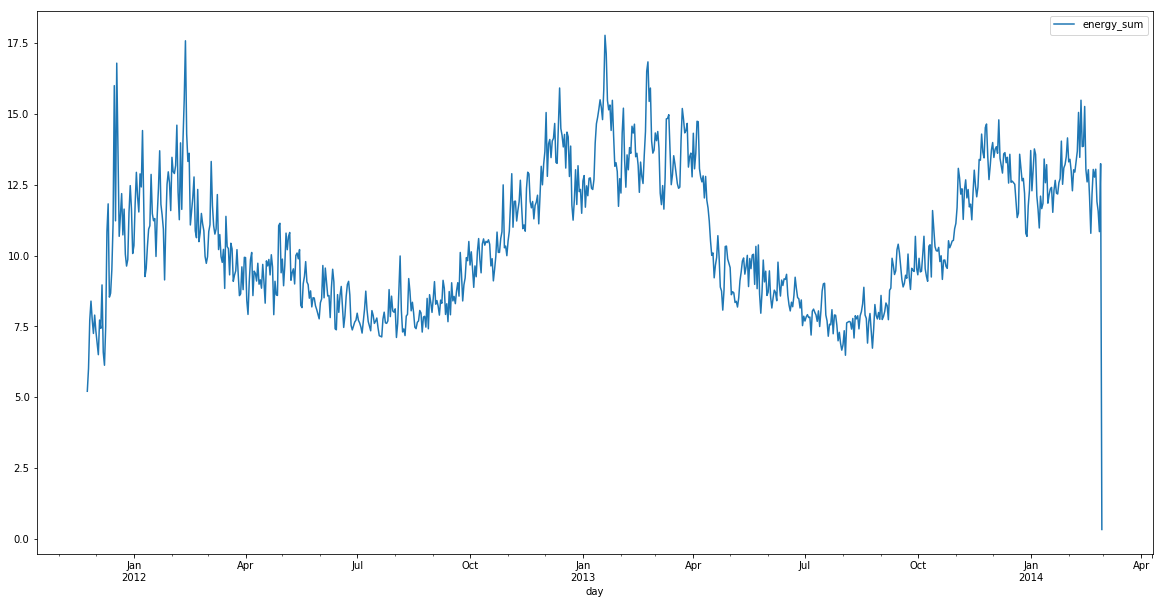

In [187]:
energy.plot(figsize=(20,10))

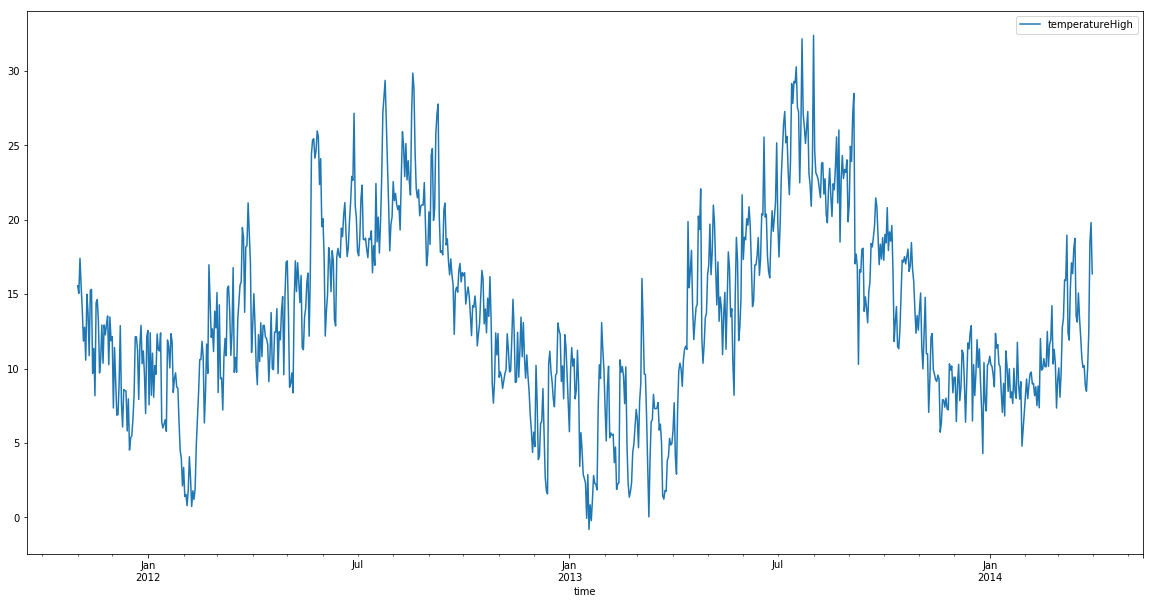

In [188]:
weather.plot(figsize=(20,10))

# Identify any trends in the datasets and discuss if trends in weather are related to trends inenergy consumption.
Off the top of my head I would have to say that energy consumption is higher in winter months December to February.
Temperature naturally is also lower overall in those months.

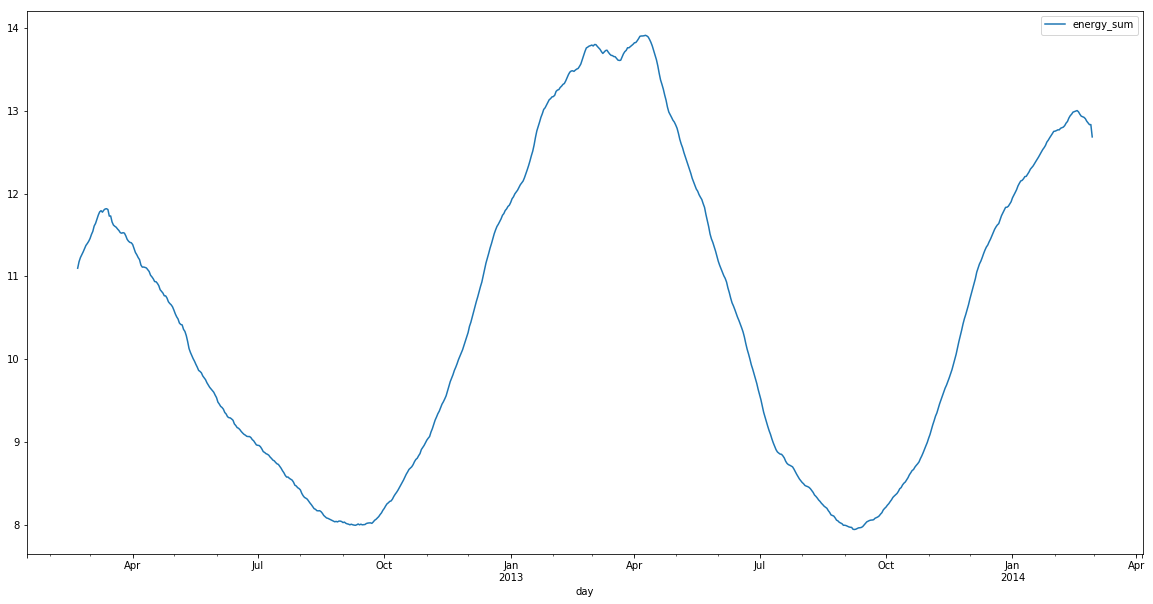

In [200]:
# lets use a 3 month(90 day) rolling average for energy
energy.rolling(90).mean().plot(figsize=(20,10))

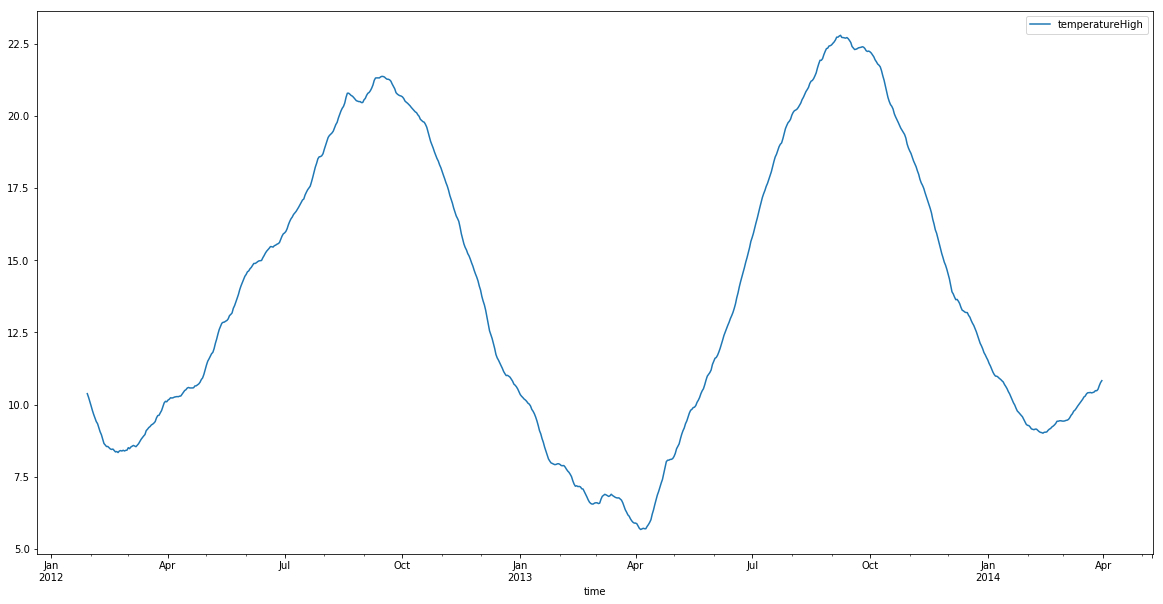

In [201]:
# lets use a 3 month(90 day) rolling average for energy
weather.rolling(90).mean().plot(figsize=(20,10))

# Identify Seasonal patterns in the datasets and discuss if seasonality in weather are related to seasonality in energy consumption

OK so using a 3 month rolling mean did the trick here. We can clearly see an inverse relationship between energy consusumption and Temperature. Temperatures are at their lowest in March-April and Energy consumption is at its highest.